# EDA (Exploratory Data Analysis) of the dataset

In this notebook, explore the Abalone dataset, by showing relevant visualizations that help understand the problem you are modelling.

Please make sure to write down your conclusions in the final notebook and to remove these intructions.

# Imports

In [22]:
%load_ext autoreload
%autoreload 2

import pandas as pd
pd.set_option('display.max_columns', 500)
import kagglehub
import os
import shutil
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

In [23]:
data_dir = os.path.join(os.getcwd(), "../data")
os.makedirs(data_dir, exist_ok=True)

# Download latest version (this will go to default location)
original_path = kagglehub.dataset_download("rodolfomendes/abalone-dataset")

# Move files to data directory
for file in os.listdir(original_path):
    src_file = os.path.join(original_path, file)
    dst_file = os.path.join(data_dir, file)
    shutil.copy2(src_file, dst_file)

print(f"Dataset downloaded and moved to: {data_dir}")
print("\nContents of the data directory:")
for file in os.listdir(data_dir):
    print(f"- {file}")

Dataset downloaded and moved to: /Users/timprivate/Desktop/HEC/MLops/xhec-mlops-project-student/notebooks/../data

Contents of the data directory:
- abalone.csv


In [24]:
df = pd.read_csv("../data/abalone.csv")

In [25]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# EDA

In [26]:
df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

In [27]:
df.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [28]:
def show_unique_values(df, max_unique=10):
    results = []
    for column in df.columns:
        unique_values = df[column].unique()
        count = len(unique_values)
        if count <= max_unique:
            values = ', '.join(map(str, unique_values))
        else:
            values = f"More than {max_unique} unique values"
        results.append([column, count, values])
    
    headers = ["Column", "Unique Count", "Unique Values"]
    print(tabulate(results, headers=headers, tablefmt="grid"))

In [29]:
show_unique_values(df, max_unique=10)

+----------------+----------------+----------------------------+
| Column         |   Unique Count | Unique Values              |
+================+================+============================+
| Sex            |              3 | M, F, I                    |
+----------------+----------------+----------------------------+
| Length         |            134 | More than 10 unique values |
+----------------+----------------+----------------------------+
| Diameter       |            111 | More than 10 unique values |
+----------------+----------------+----------------------------+
| Height         |             51 | More than 10 unique values |
+----------------+----------------+----------------------------+
| Whole weight   |           2429 | More than 10 unique values |
+----------------+----------------+----------------------------+
| Shucked weight |           1515 | More than 10 unique values |
+----------------+----------------+----------------------------+
| Viscera weight |       

In [47]:
def load_and_overview(file_path):
    """
    Load the CSV file and provide an overview of the dataset.
    """
    df = pd.read_csv(file_path)
    print("Dataset Overview:")
    print(df.info())
    print("\nFirst few rows:")
    print(df.head())
    return df

def check_missing_values(df):
    """
    Check for missing values in the dataset.
    """
    missing = df.isnull().sum()
    missing_percent = 100 * df.isnull().sum() / len(df)
    missing_table = pd.concat([missing, missing_percent], axis=1, keys=['Missing Values', '% Missing'])
    print("Missing Values Analysis:")
    print(missing_table)

def analyze_categorical_variables(df):
    """
    Analyze categorical variables in the dataset.
    """
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        print(f"\nDistribution of {col}:")
        print(df[col].value_counts(normalize=True))
        plt.figure(figsize=(10, 6))
        df[col].value_counts().plot(kind='bar')
        plt.title(f"Distribution of {col}")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()

def analyze_numerical_variables(df):
    """
    Analyze numerical variables in the dataset.
    """
    numerical_cols = df.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns
    print("\nNumerical Variables Summary:")
    print(df[numerical_cols].describe())
    
    for col in numerical_cols:
        plt.figure(figsize=(12, 6))
        plt.subplot(121)
        df[col].hist()
        plt.title(f"Histogram of {col}")
        plt.subplot(122)
        stats.probplot(df[col].dropna(), dist="norm", plot=plt)
        plt.title(f"Q-Q plot of {col}")
        plt.tight_layout()
        plt.show()

def analyze_target_variable(df, target_col='Rings'):
    """
    Analyze the target variable (Rings) and its relationship with other features.
    """
    print(f"\nTarget Variable ({target_col}) Distribution:")
    print(df[target_col].value_counts(normalize=True))
    
    plt.figure(figsize=(10, 6))

    df[target_col].value_counts().sort_index().plot(kind='bar')

    plt.title(f"Distribution of {target_col}")
    plt.ylabel("Count")
    plt.xlabel(f"{target_col}")
    plt.show()


    
    numerical_cols = df.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns
    for col in numerical_cols:
        if col != target_col:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=target_col, y=col, data=df)
            plt.title(f"{col} vs {target_col}")
            plt.show()

def correlation_analysis(df):
    """
    Perform correlation analysis on numerical variables.
    """
    numerical_cols = df.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns
    corr_matrix = df[numerical_cols].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

def run_eda(df):
    """
    Run all EDA functions in sequence.
    """
    check_missing_values(df)
    analyze_categorical_variables(df)
    analyze_numerical_variables(df)
    analyze_target_variable(df)
    correlation_analysis(df)

In [48]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [49]:
numerical_cols = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight']
categorical_cols = ['Sex', 'Rings']

Missing Values Analysis:
                Missing Values  % Missing
Sex                          0        0.0
Length                       0        0.0
Diameter                     0        0.0
Height                       0        0.0
Whole weight                 0        0.0
Shucked weight               0        0.0
Viscera weight               0        0.0
Shell weight                 0        0.0
Rings                        0        0.0

Distribution of Sex:
Sex
M    0.365813
I    0.321283
F    0.312904
Name: proportion, dtype: float64


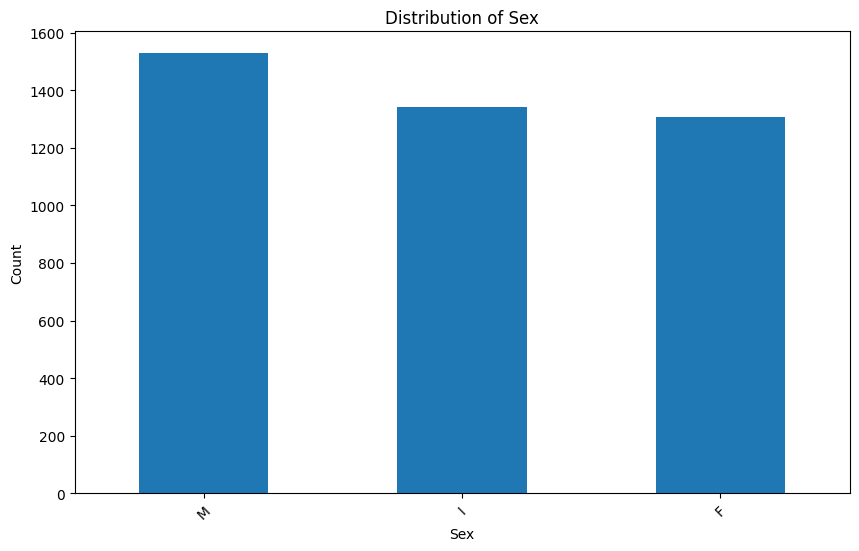


Distribution of Rings:
Rings
9     0.164951
10    0.151784
8     0.135983
11    0.116591
7     0.093608
12    0.063921
6     0.062006
13    0.048599
14    0.030165
5     0.027532
15    0.024659
16    0.016040
17    0.013886
4     0.013646
18    0.010055
19    0.007661
20    0.006225
3     0.003591
21    0.003352
23    0.002155
22    0.001436
27    0.000479
24    0.000479
26    0.000239
1     0.000239
25    0.000239
2     0.000239
29    0.000239
Name: proportion, dtype: float64


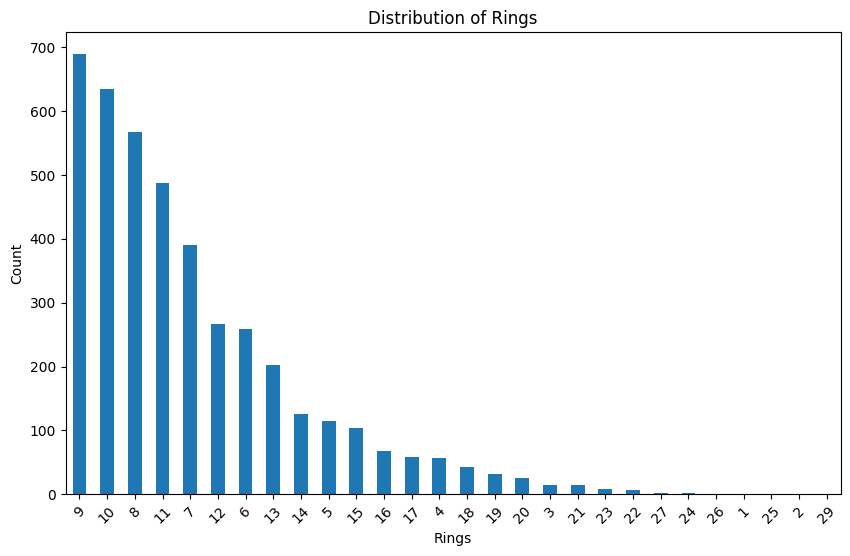


Numerical Variables Summary:
            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight  
count     4177.000000   4177.000000  
mean         0.180594      0.238831  
std          0.109614      0.139203  
min          0.000500      0.001500  
25%          0.093500      0.130000  
50%          0.171000      0.234000  
7

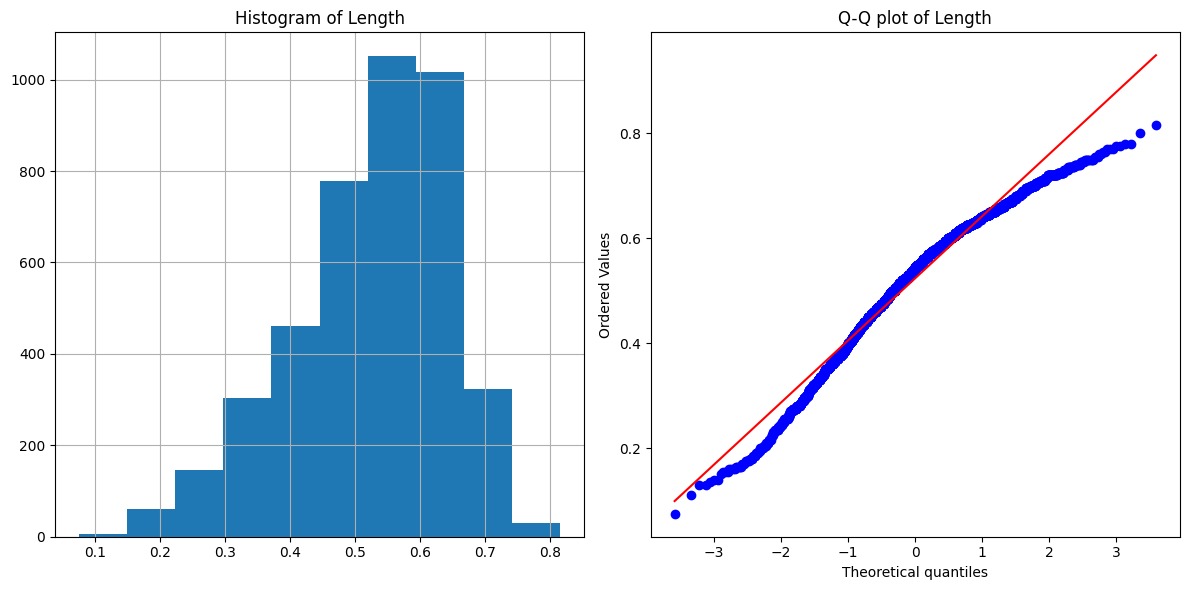

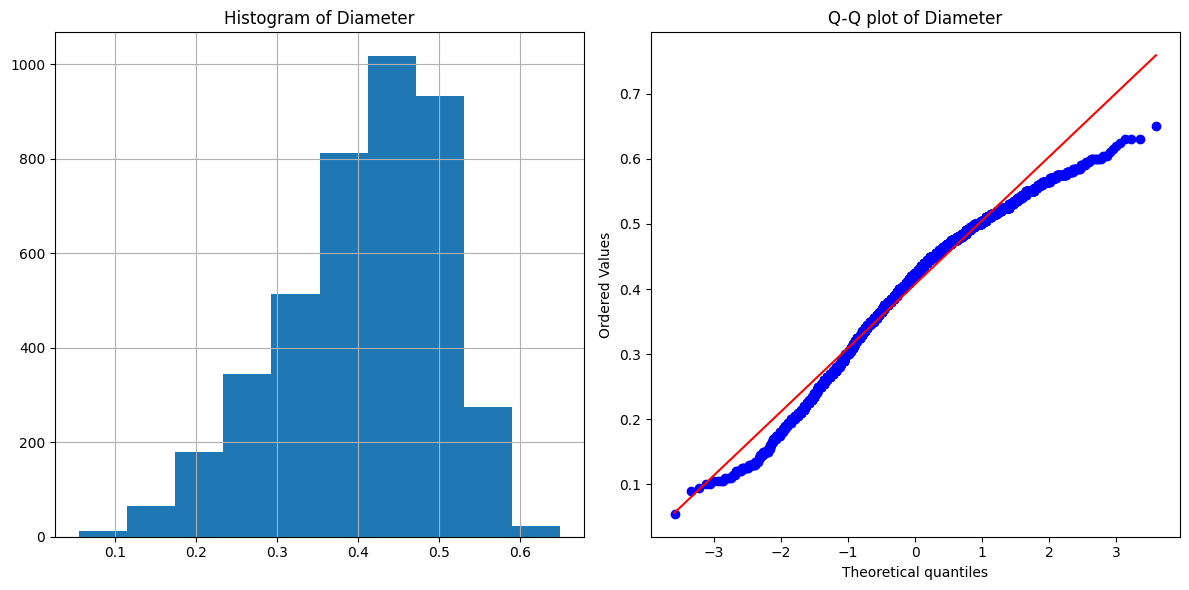

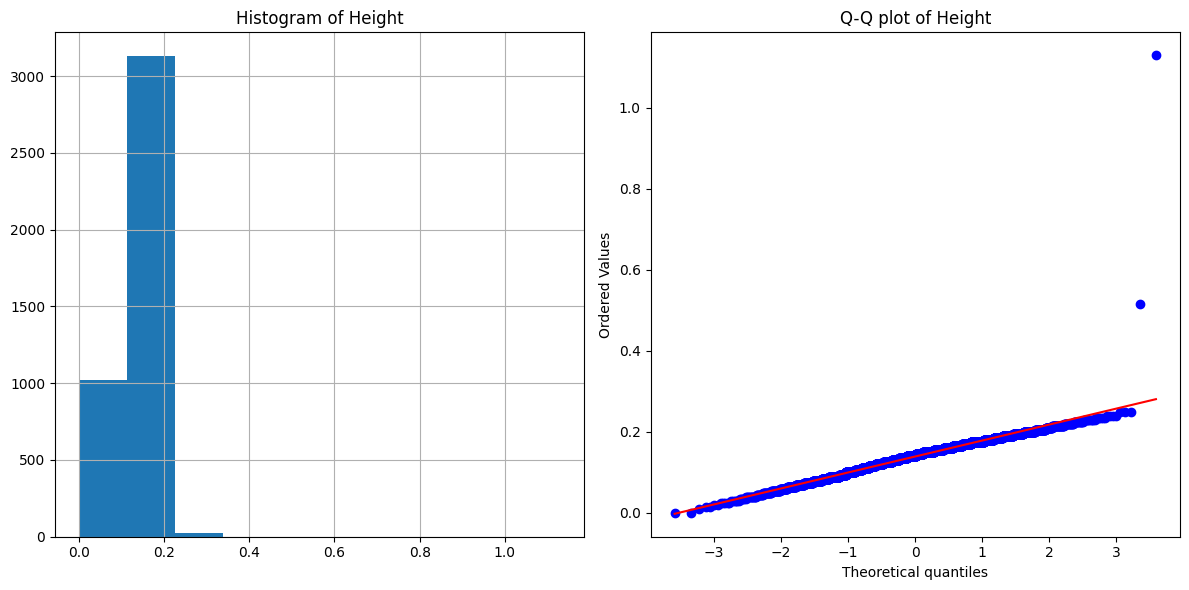

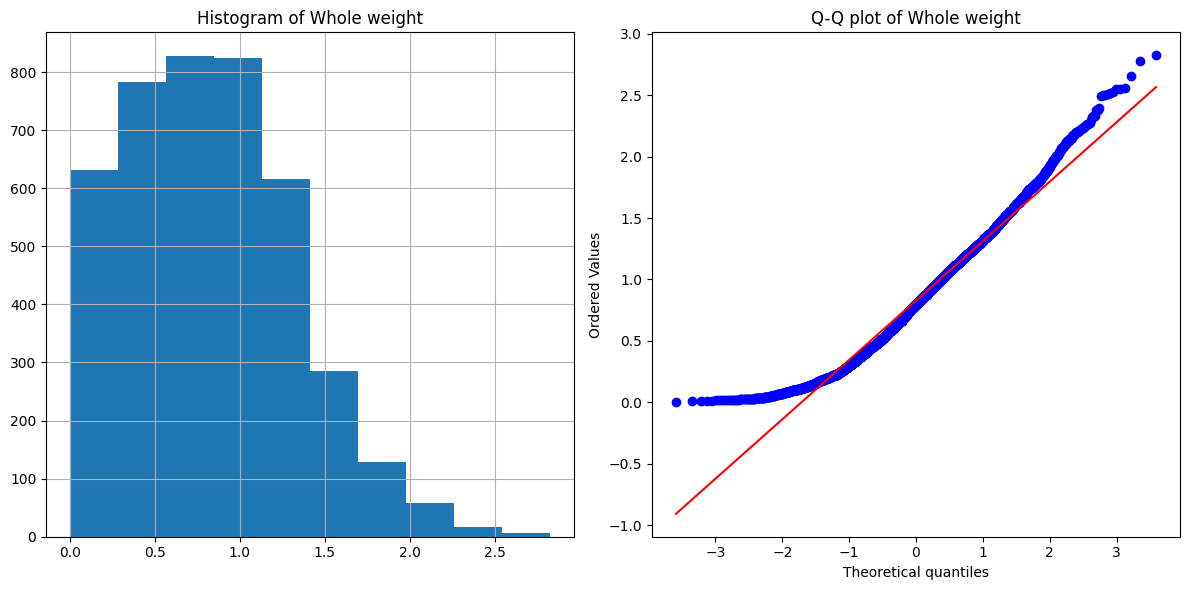

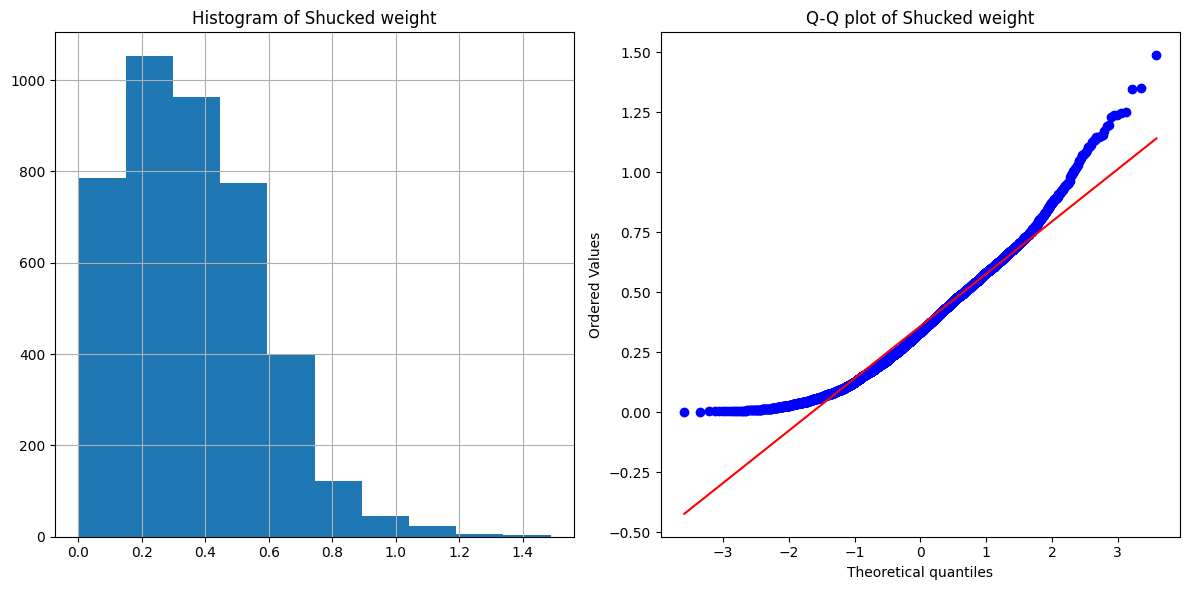

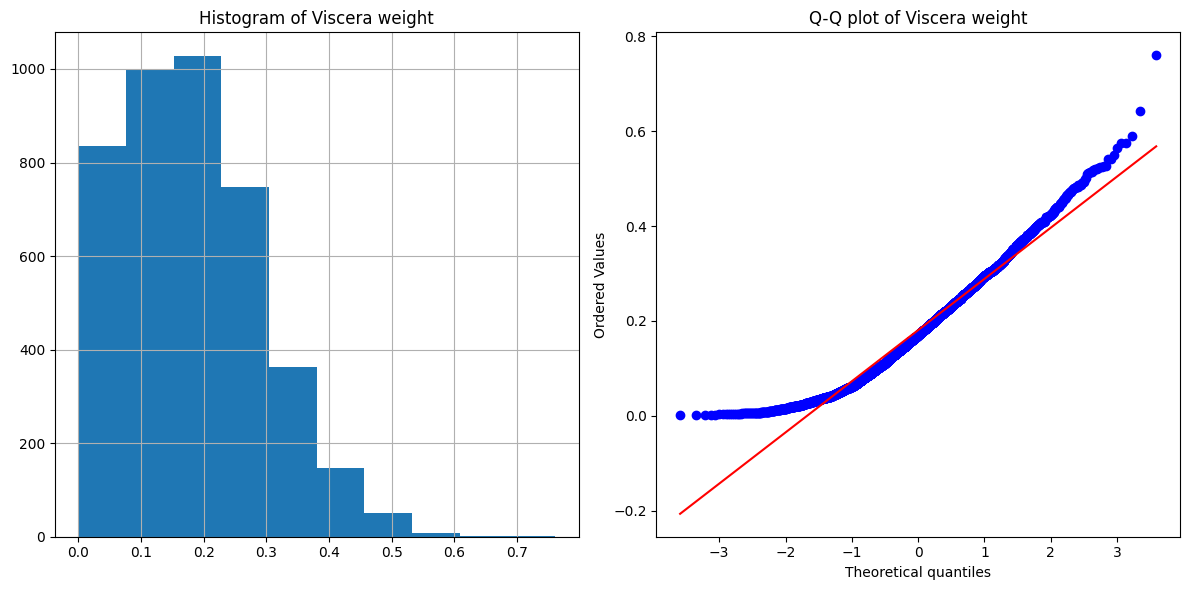

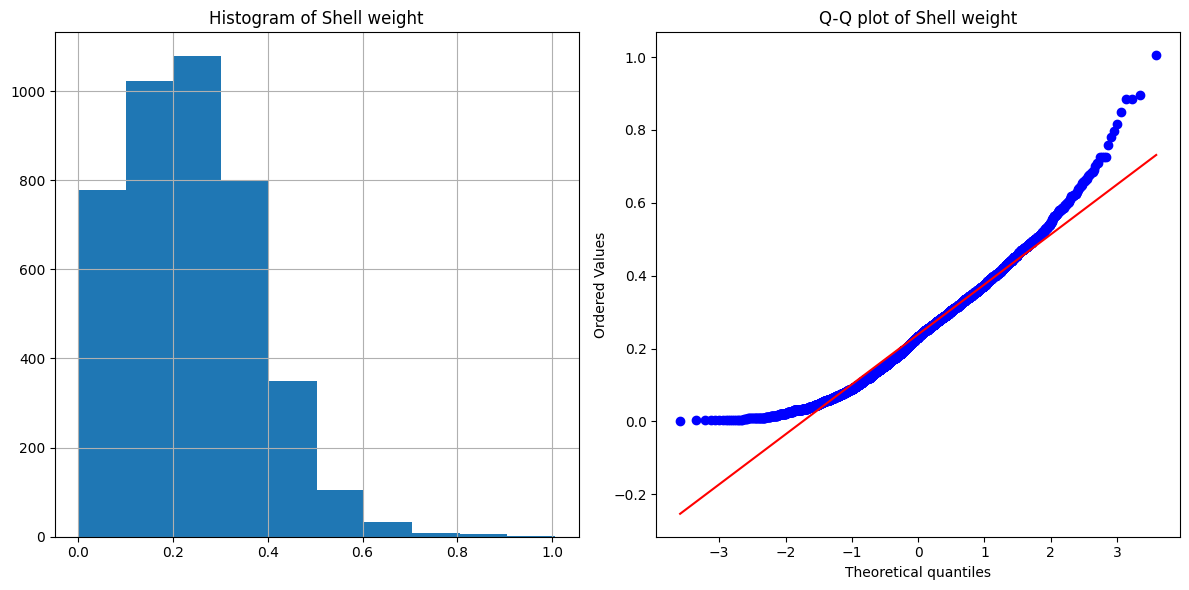


Target Variable (Rings) Distribution:
Rings
9     0.164951
10    0.151784
8     0.135983
11    0.116591
7     0.093608
12    0.063921
6     0.062006
13    0.048599
14    0.030165
5     0.027532
15    0.024659
16    0.016040
17    0.013886
4     0.013646
18    0.010055
19    0.007661
20    0.006225
3     0.003591
21    0.003352
23    0.002155
22    0.001436
27    0.000479
24    0.000479
26    0.000239
1     0.000239
25    0.000239
2     0.000239
29    0.000239
Name: proportion, dtype: float64


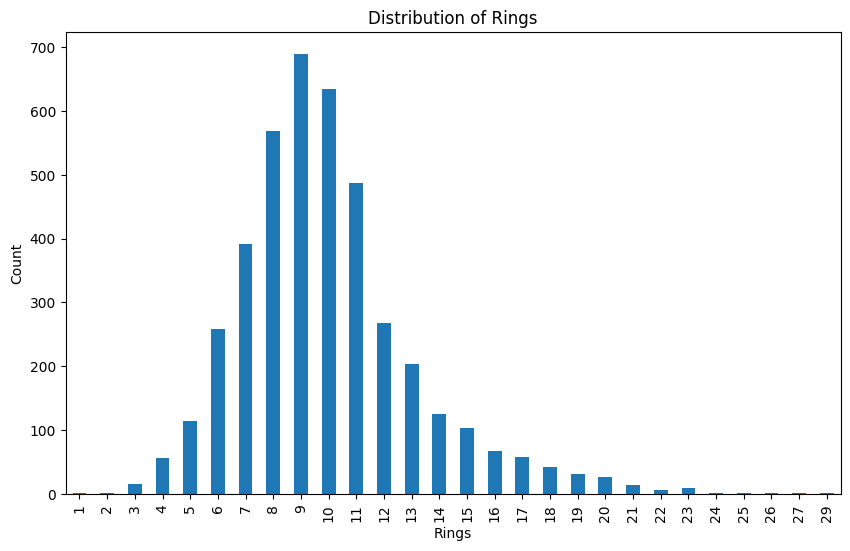

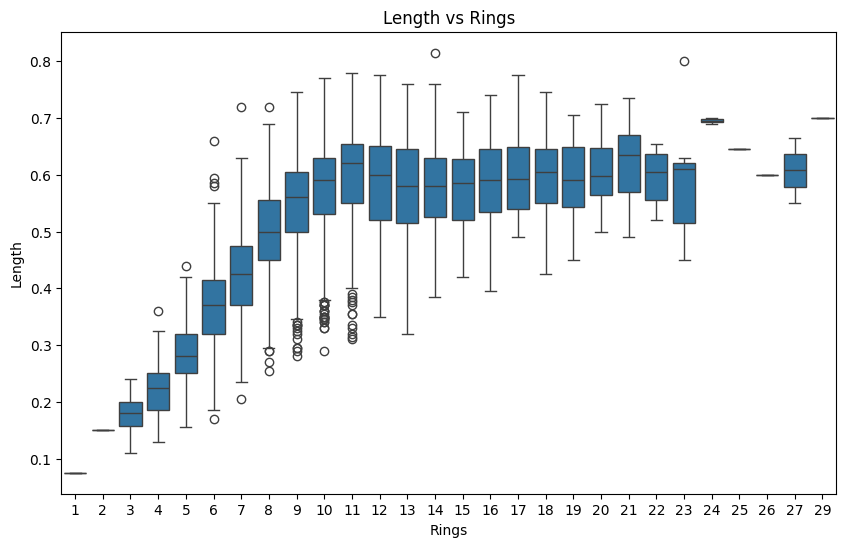

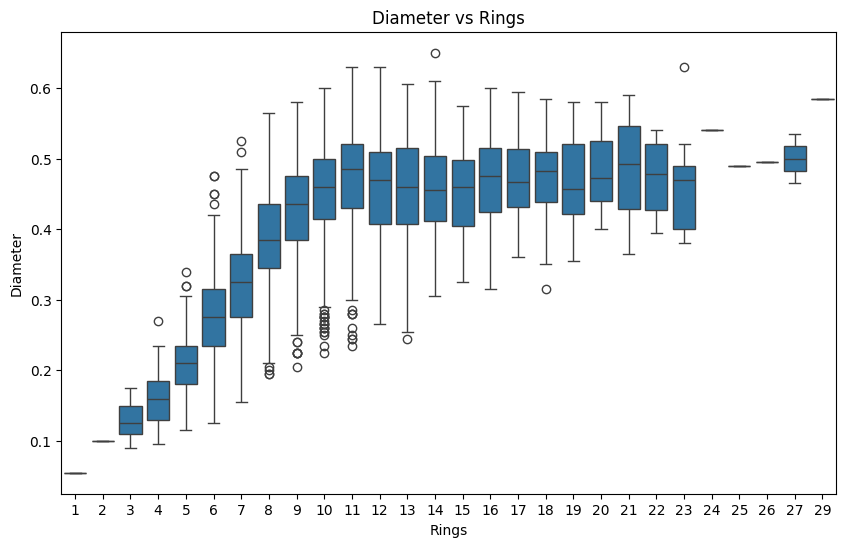

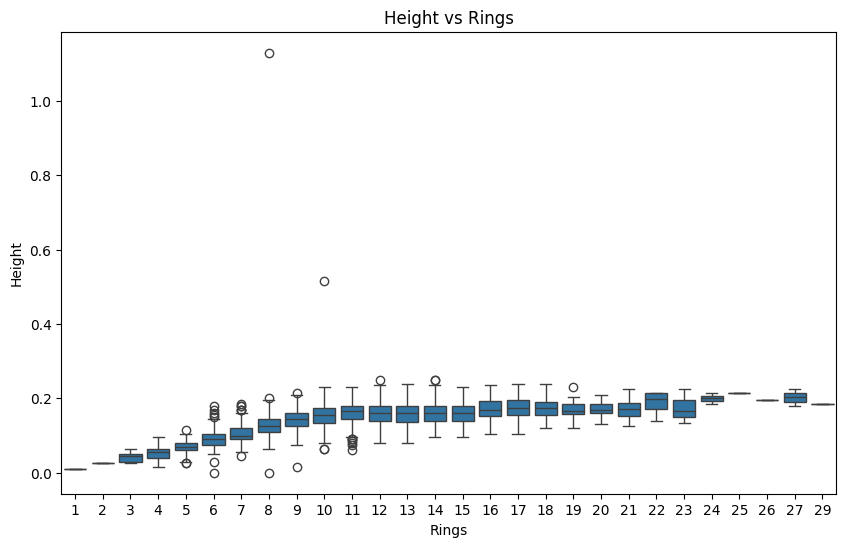

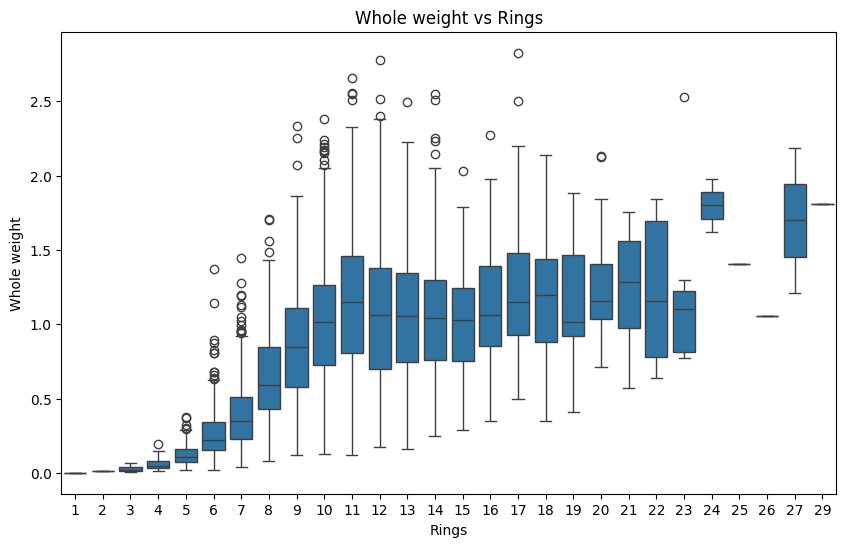

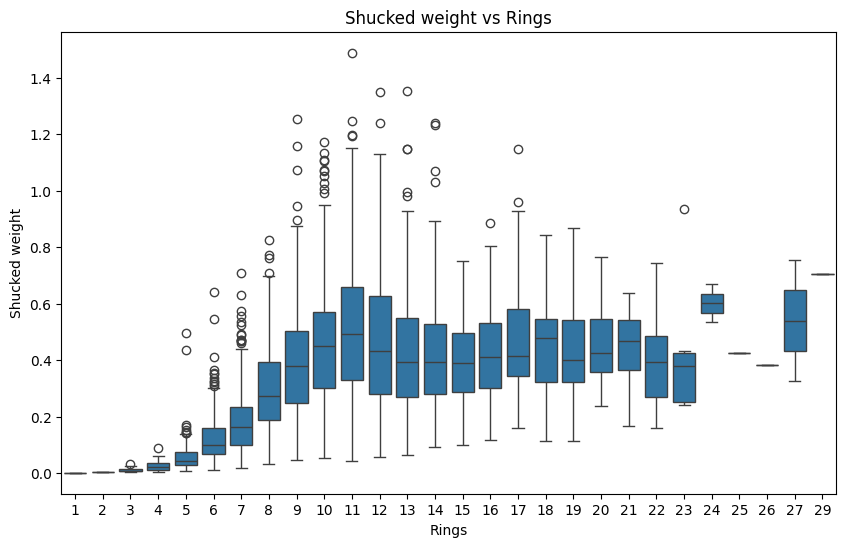

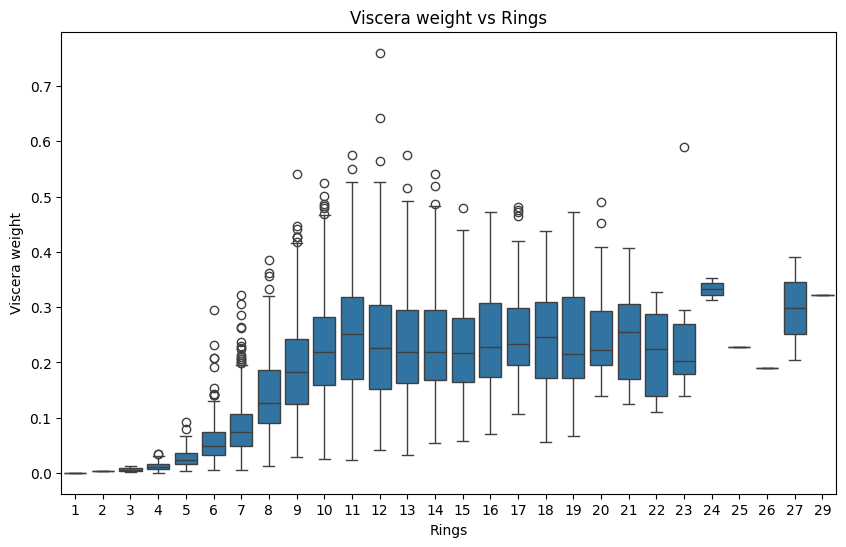

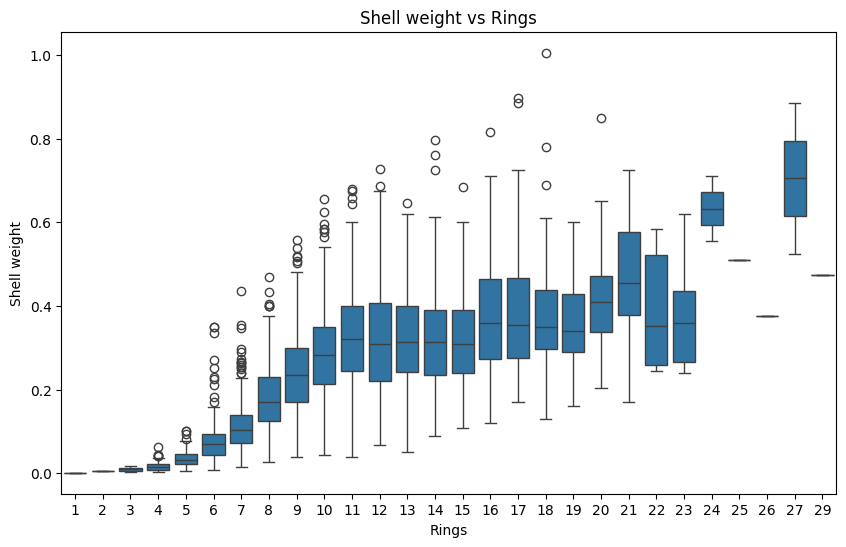

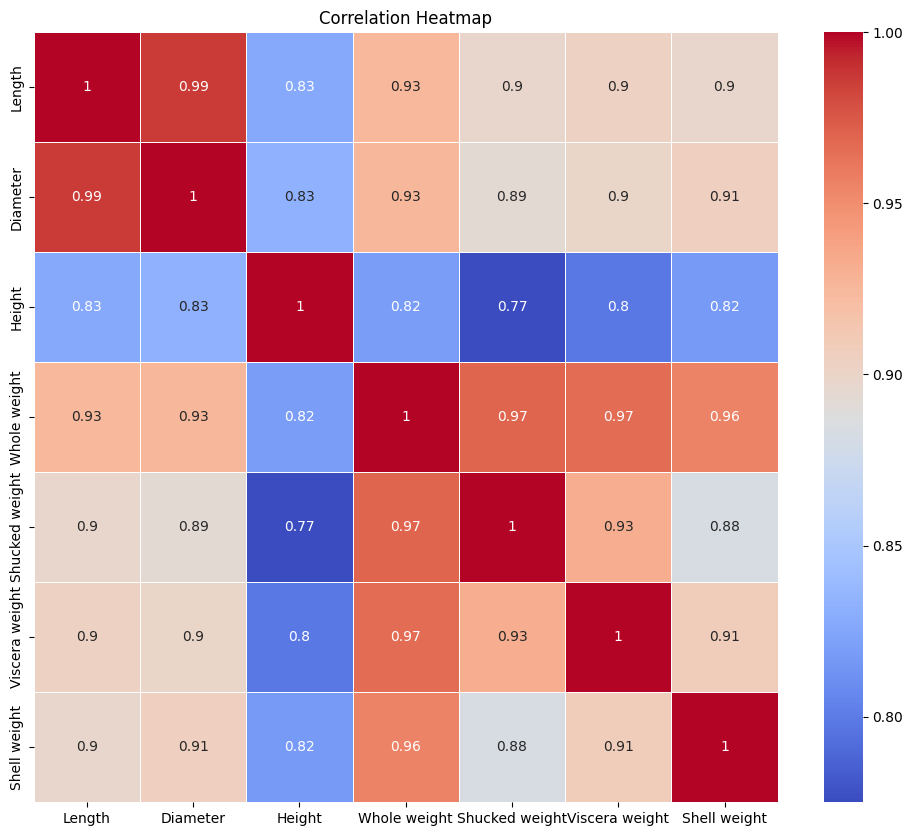

In [50]:
df[numerical_cols] = df[numerical_cols].astype('float32')
df[categorical_cols] = df[categorical_cols].astype('category')
run_eda(df)